# kmeans clustering

In this notebook, I will deploy the kmeans clustering algorithm using the famous `Iris` dataset.
___



### Load libraries and set seed



In [1]:
library(stats)
library(ggplot2)
library(lattice)
set.seed(37)

Warning message:
"package 'lattice' was built under R version 3.4.3"



### Load data

Lucky for us, the Iris dataset comes prepacked with R and is accessible by simply typing `iris`



In [2]:
data <- as.data.frame(iris)



### Check head of data



In [3]:
head(data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa




### Check str of data



In [4]:
str(data)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...




### Check summary of data



In [5]:
summary(data)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                



### Data visualization and exploration

reference:  https://stackoverflow.com/a/15600080 https://stackoverflow.com/a/7721594
            
            
            

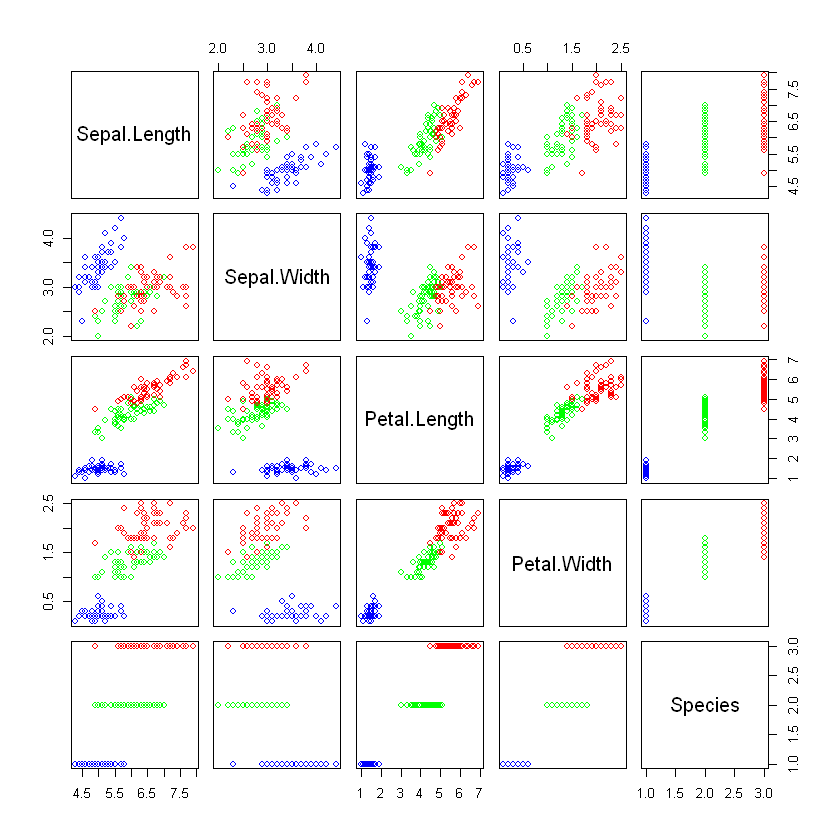

In [6]:
cols <- character(nrow(iris))
cols[] <- "black"

cols[iris$Species == "setosa"] <- "blue"
cols[iris$Species == "versicolor"] <- "green"
cols[iris$Species == "virginica"] <- "red"
pairs(iris,col=cols)



From the plot above, we can definitely see three distinct clusters in all of the attributes' plots except the sepal width vs. sepal length attributes.





### Seperate attributes from response in raw data

We run kmeans on a matrix of attributes *** not *** including the response. So first lets seperate the attributes from the response in our raw data.



In [7]:
data_attributes <- as.matrix(data[-5])
head(data_attributes)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4




### Set parameter k

k corresponds to the number of clusters our data will try to find. We know there are three species of iris present because we were given the label in the input data. However, this is an unsupervised machine learning algorithm, so let's play along and act like we do not how many potential clusters might be in our data. To start with let's try k[1,20]. Our max number of iterations and optimization algorithm are also parameters that can vary. Lets cluster the iris using the default max number of iterations and default `Lloyd` algorithm to start.

reference: https://drive.google.com/open?id=0B7YNXrmnE6n2OWlPNEZMOVd6OVU



In [8]:
distances <- rep(0,20)

for (k in 1:length(distances)){
    kmeans_model_lloyd <- kmeans(data_attributes, k, 
                                 algorithm='Lloyd')
    distances[k] <- kmeans_model_lloyd$tot.withins
}

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"



### Plot the "elbow" diagram

An "elbow" diagram is a plot of the mean distance between clusters vs. the values of k. It is called an elbow diagram because... well... its shaped like an elbow! The "funny-bone" in the "elbow" diagram (punny, I know) is the optimal value of k. This value is optimal because all other values observed past this point are essentially trying to overfit the data and minimize the mean distance between clusters in the process.



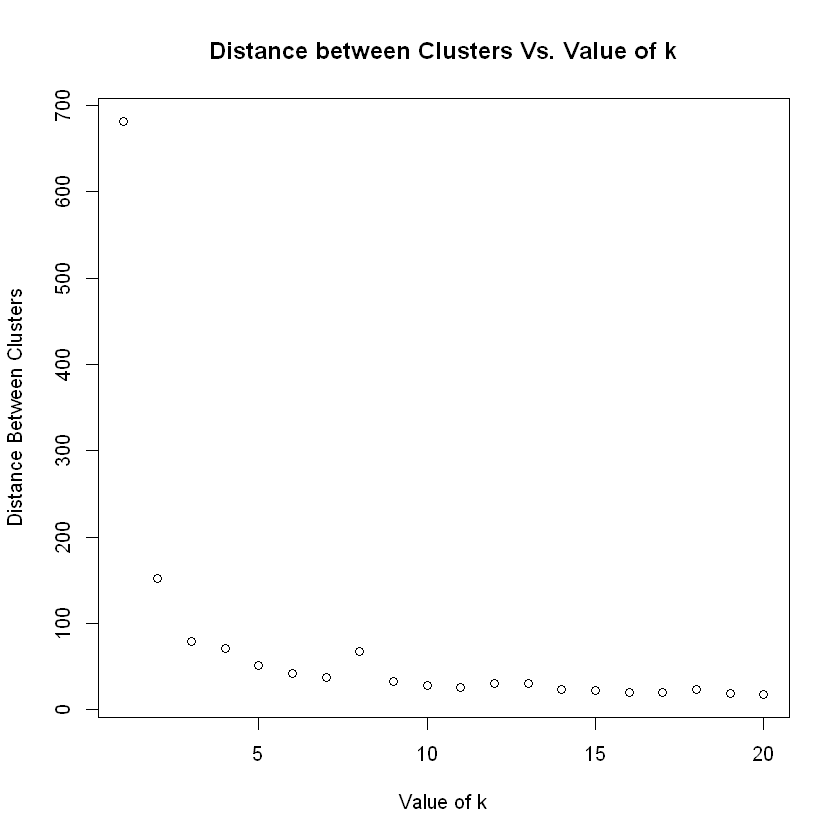

In [9]:
plot(distances, 
     main='Distance between Clusters Vs. Value of k', 
     ylab='Distance Between Clusters', xlab='Value of k')



From the elbow diagram above, we clearly see that a k = 3 value is the optimal number of clusters found within our dataset. This matches our known output of three classes.





### Print optimal kmeans model results



In [10]:
optimal_kmeans_model_lloyd <- kmeans(data_attributes, 3, algorithm = 'Lloyd')
print(optimal_kmeans_model_lloyd)

Warning message:
"did not converge in 10 iterations"

K-means clustering with 3 clusters of sizes 57, 50, 43

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.854386    2.742105     4.345614    1.408772
2     5.006000    3.428000     1.462000    0.246000
3     6.802326    3.044186     5.648837    2.030233

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 3 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 34.12737 15.15100 30.31395
 (between_SS / total_SS =  88.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      




### Compare clustering algorithm vs actuals



In [11]:
optimal_kmeans_model_lloyd$size

[1] 57 50 43

In [12]:
summary(data$Species)

setosa versicolor  virginica 
        50         50         50



Our kmeans algorithm correctly clustered the virginica species, but missed the mark on the setosa and versicolor species using the default `Lloyd` algorithm. Lets visualize how kmeans clustered the different attributes below:





### Replot data visualization with cluster centers overlayed on pairs plot

reference: https://stackoverflow.com/a/20522724



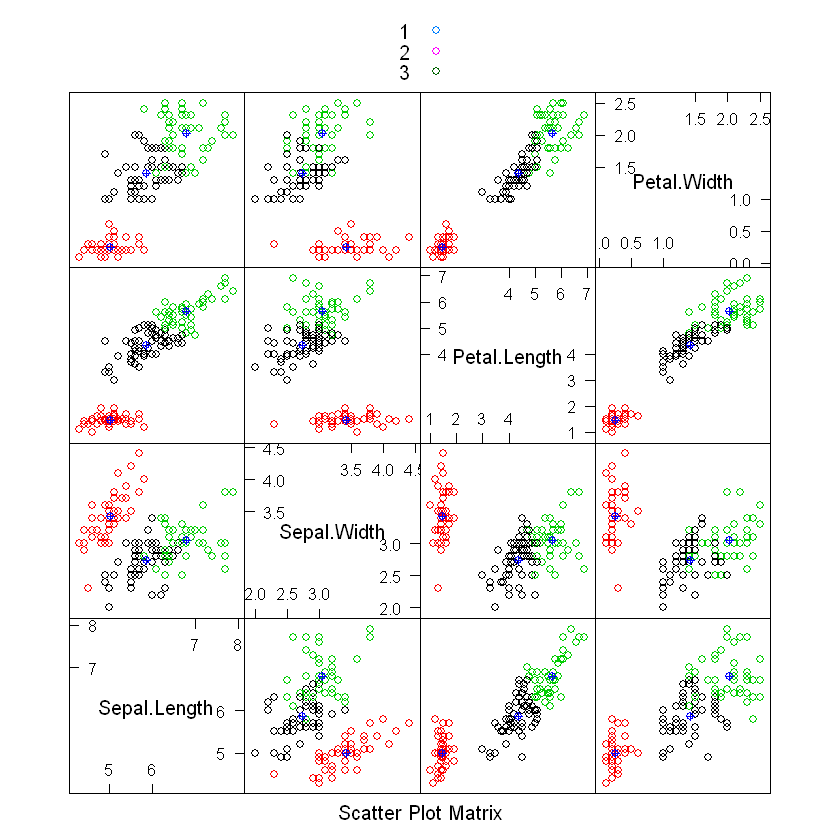

In [13]:
splom(data[-5],groups=optimal_kmeans_model_lloyd$cluster,pch=21,
            panel=function(x, y,i,j,groups, ...) {
                panel.points(x, y, pch=21,col=groups)
                panel.points(optimal_kmeans_model_lloyd$center[,j],
                             optimal_kmeans_model_lloyd$center[,i],
                             pch=10,col='blue')
            },auto.key=TRUE)



## Trying different optimization algorithms with k = 3 and plotting the results

### Hartigan-Wong



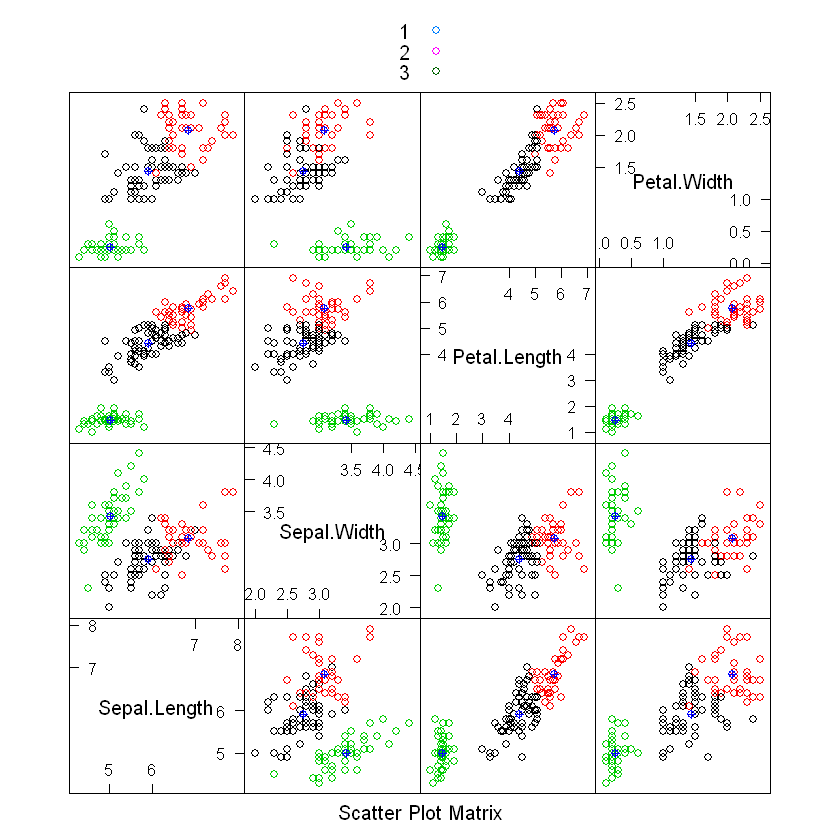

In [14]:
optimal_kmeans_model_hartigan_wong <- kmeans(data_attributes, 3, 
                                             algorithm = "Hartigan-Wong")

splom(data[-5],groups=optimal_kmeans_model_hartigan_wong$cluster,pch=21,
            panel=function(x, y,i,j,groups, ...) {
                panel.points(x, y, pch=21,col=groups)
                panel.points(optimal_kmeans_model_hartigan_wong$center[,j],
                             optimal_kmeans_model_hartigan_wong$center[,i],
                             pch=10,col='blue')
            },auto.key=TRUE)



### Compare clustering algorithm vs actuals



In [15]:
optimal_kmeans_model_hartigan_wong$size

[1] 62 38 50

In [16]:
summary(data$Species)

setosa versicolor  virginica 
        50         50         50



Hartigan-Wong optimization algorithm got the setosa species correctly clustered, but missed the mark on the versicolor and virginica species.





### Forgy Algorithm

*** Note: *** Forgy algorithm is exactly the same as Lloyd algorithm.

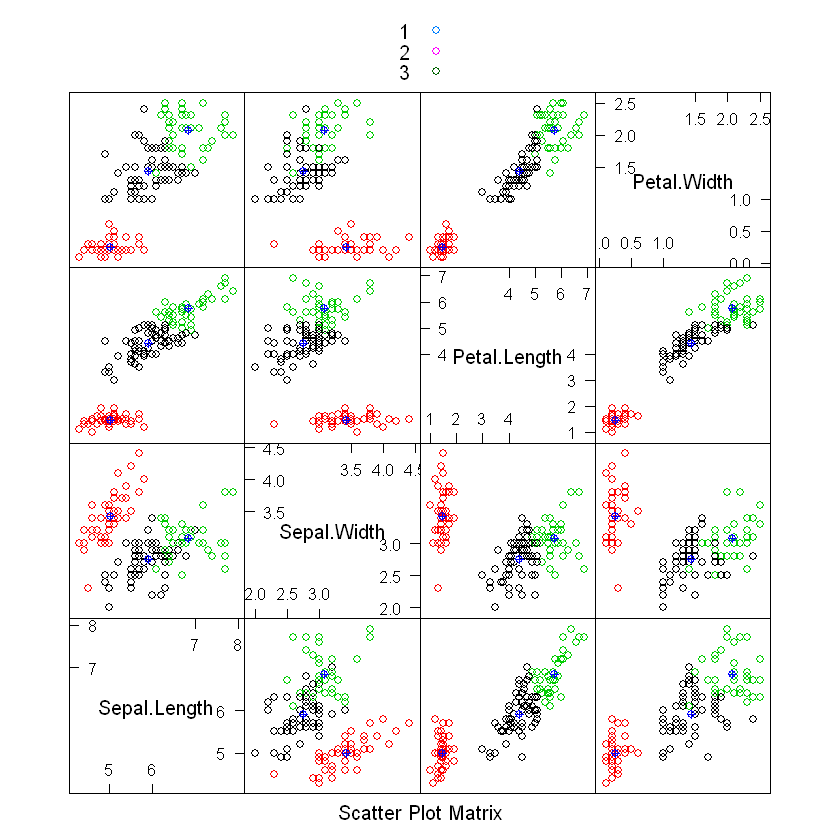

In [17]:
optimal_kmeans_model_forgy <- kmeans(data_attributes, 3, 
                                     algorithm = "Forgy")

splom(data[-5],groups=optimal_kmeans_model_forgy$cluster,pch=21,
            panel=function(x, y,i,j,groups, ...) {
                panel.points(x, y, pch=21,col=groups)
                panel.points(optimal_kmeans_model_forgy$center[,j],
                             optimal_kmeans_model_forgy$center[,i],
                             pch=10,col='blue')
            },auto.key=TRUE)



### Compare clustering algorithm vs actuals



In [18]:
optimal_kmeans_model_forgy$size

[1] 62 50 38

In [19]:
summary(data$Species)

setosa versicolor  virginica 
        50         50         50



Forgy optimization algorithm gave us the exact same results as the Lloyd algorithm as expected.





### MacQueen Algorithm



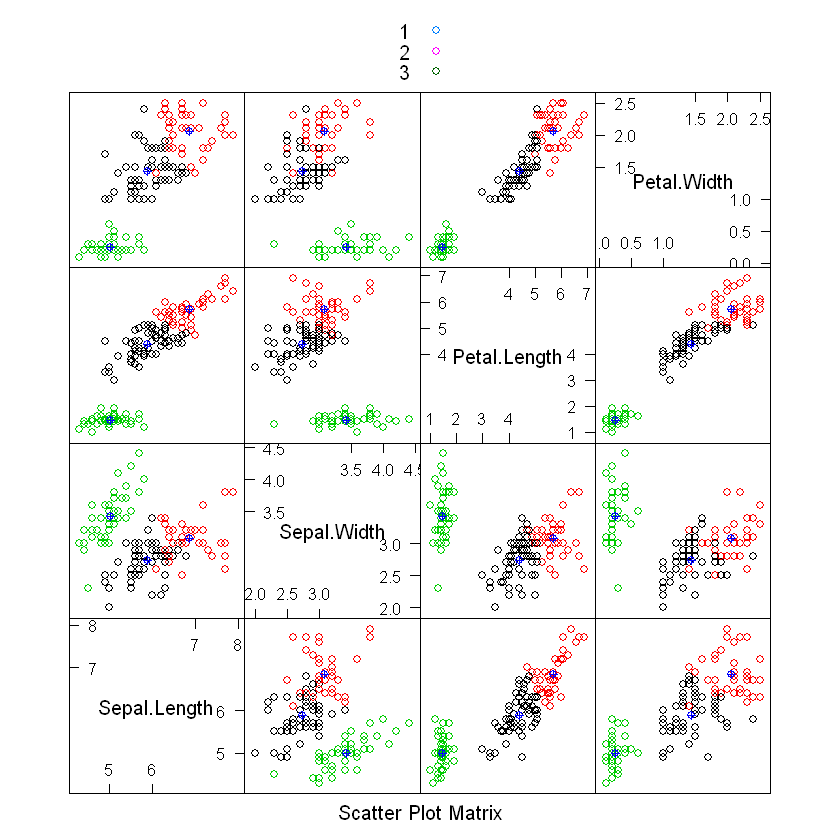

In [20]:
optimal_kmeans_model_mac <- kmeans(data_attributes, 3, 
                                   algorithm = "MacQueen")

splom(data[-5],groups=optimal_kmeans_model_mac$cluster,pch=21,
            panel=function(x, y,i,j,groups, ...) {
                panel.points(x, y, pch=21,col=groups)
                panel.points(optimal_kmeans_model_mac$center[,j],
                             optimal_kmeans_model_mac$center[,i],
                             pch=10,col='blue')
            },auto.key=TRUE)



### Compare clustering algorithm vs actuals



In [21]:
optimal_kmeans_model_mac$size

[1] 61 39 50

In [22]:
summary(data$Species)

setosa versicolor  virginica 
        50         50         50



MacQueen optimization algorithm got the virginica species correctly clustered, but missed the mark on the setosa and versicolor species.





### Commentary

All of the optimization algorithms cluster the points slightly differently, based on the underlying optimization algorithm each of them is trying to solve. All of the kmeans algorithm got atleast one of the species clustered correctly.